In [1]:
#/Users/hafijurrhaman/Downloads/python-data-Ai/generative_ai_class/student_marks_prediction_deployment

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
#importing the dataset
df = pd.read_csv(r'/Users/hafijurrhaman/Downloads/python-data-Ai/generative_ai_class/student_marks_prediction_deployment/student_info.csv')
# Check the data
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


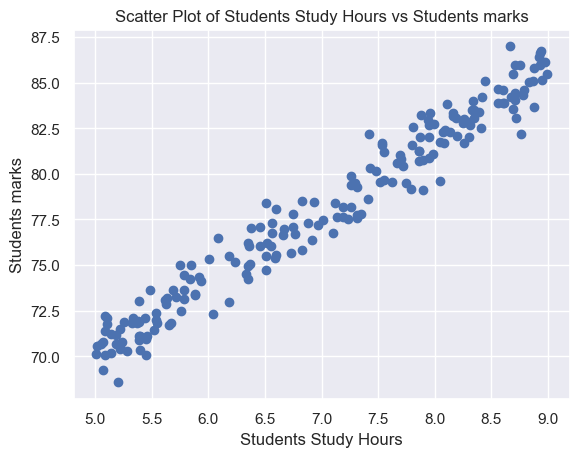

In [2]:
plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [3]:
df2 = df.fillna(df.mean())

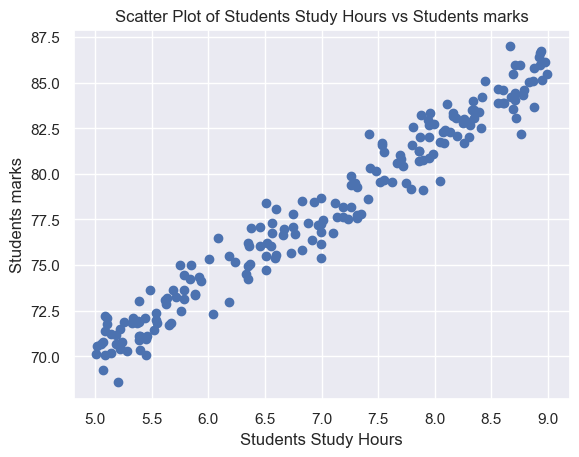

In [4]:
plt.scatter(x =df2.study_hours, y = df2.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

In [5]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (200, 1)
shape of y =  (200, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


In [7]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
lr.coef_

array([[3.93571802]])

In [10]:
lr.intercept_

array([50.44735504])

In [11]:
lr.predict([[4]])[0][0].round(2)

66.19

In [12]:
y_pred  = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [13]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [14]:
lr.score(X_test,y_test)

0.9514124242154466

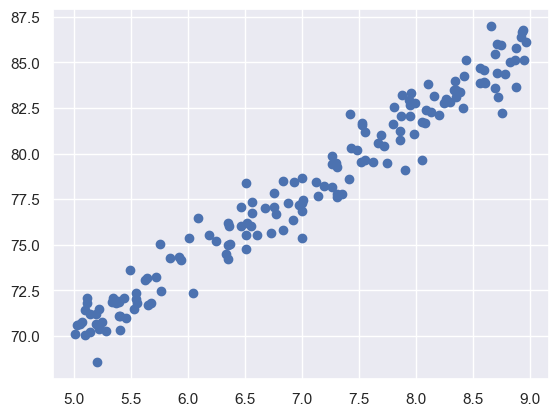

In [15]:
plt.scatter(X_train,y_train)

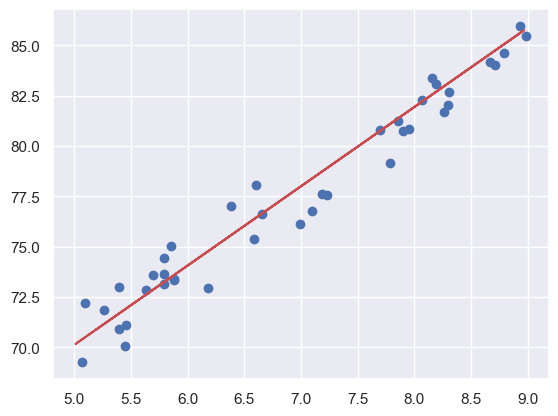

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [17]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [18]:
model = joblib.load("student_mark_predictor.pkl")

In [19]:
model.predict([[5]])[0][0]

70.12594512018406